# calibration analysis

Ana the calibration parameters from different calibration runs

In [1]:
# general imports
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import tables
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

In [2]:
idate, ihour = time.strftime("%d/%m/%Y"), time.strftime("%H:%M:%S")
print('last visit {} at {}'.format(idate, ihour))

last visit 29/10/2016 at 16:53:07


In [3]:
idir = '/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/Data/NEW/pmtcalib/'
runs = [1994, 2012, 2014, 2063, 2064, 2065, 2066, 2068, 2069, 2070]

In [4]:
def getpan(irun):
    ifile = 'calf_R'+str(irun)+'_pg_panda.h5'
    store = pd.HDFStore(idir+ifile)
    pan = store.df
    return pan

pans = map(getpan, runs)

In [5]:
nruns = len(runs)
def var(label,k):
    return np.array(map(lambda i: pans[i][label][k], range(nruns)))

nsens = 12
sens = range(nsens)

In [6]:
labels = map(str, pans[0].columns)
print(labels)
dopan = {}
for label in labels:
    vmean, vstd = [], []
    for i in range(nsens):
        xvar = var(label,i)
        vmean.append(np.mean(xvar))
        vstd.append(np.std(xvar))
    dopan[label] = np.array(vmean)
    dopan['e'+label] =np.array(vstd)
opan = pd.DataFrame(dopan)

['chi2', 'gain', 'indexes', 'noise', 'noise-pe', 'ntot', 'pedestal', 'pes']


In [7]:
opan

,chi2,echi2,egain,eindexes,enoise,enoise-pe,entot,epedestal,epes,gain,indexes,noise,noise-pe,ntot,pedestal,pes
0,0.865259,0.089125,0.610413,0.0,0.381209,0.758833,59.151875,0.339437,0.518904,17.428622,10.0,7.623354,6.583663,119849.357699,0.146320,1.054707
1,0.916670,0.149079,0.342333,0.0,0.315649,0.588330,34.668193,0.228852,0.455659,19.753431,11.0,7.590457,7.569431,119816.763332,0.161858,0.925466
2,0.895153,0.135453,0.384365,0.0,0.354628,0.538479,41.679559,0.230840,0.550386,20.457672,8.0,7.021289,7.223702,119848.040556,0.306719,1.095980
3,0.884336,0.110763,0.337548,0.0,0.379215,0.476664,61.397246,0.134772,0.484761,25.118604,9.0,7.262983,8.930547,119792.708830,0.299124,0.946790
4,0.973980,0.179182,0.899830,0.0,0.425064,0.777983,117.075122,0.503430,0.555175,23.093848,0.0,7.621489,9.585797,119776.518928,0.325574,1.161004
5,1.286652,0.729750,1.806608,0.0,1.234620,1.636750,494.776286,2.211382,0.552674,24.618756,1.0,8.168156,9.940464,119568.359873,1.194277,1.329976
6,0.976583,0.107962,0.620440,0.0,0.403863,0.729293,81.991398,0.579847,0.552744,25.355296,2.0,7.721829,9.360204,119752.876289,0.404076,1.128615
7,0.908677,0.133985,0.290931,0.0,0.351010,0.564284,40.115878,0.162538,0.364945,25.897288,3.0,7.457024,10.141758,119836.977676,0.065571,0.721419
8,0.910205,0.087153,0.490112,0.0,0.104173,0.601729,50.392329,0.104332,0.504436,23.821737,4.0,7.495795,8.485968,119792.591239,0.274112,0.988572
9,0.860715,0.111864,0.499567,0.0,0.189480,0.549785,49.791461,0.329972,0.560002,20.967350,5.0,7.502173,7.227339,119851.295564,0.380016,1.111146


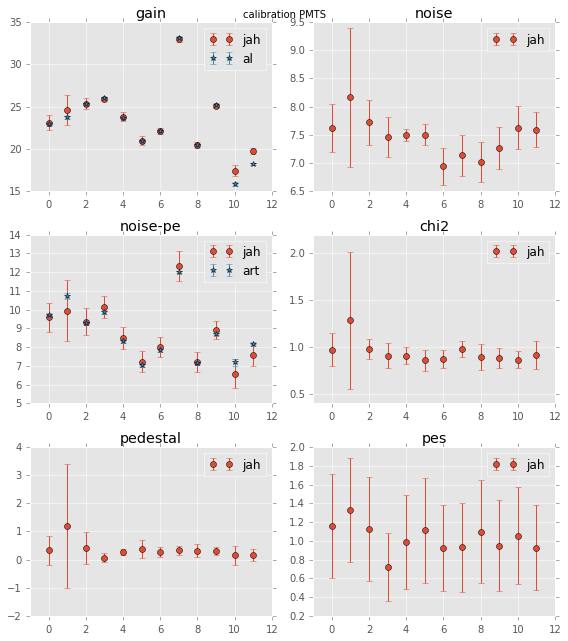

In [16]:
import calib as sc

again = [22.91, 23.75, 25.3, 25.99, 23.70, 20.89, 22.13, 33.09, 20.43, 25.16, 15.85, 18.21]
aegain = [0.14, 0.17, 0.09, 0.09, 0.08, 0.11, 0.08, 0.06, 0.11, 0.07, 0.25, 0.15]

anoise_pe = [9.69, 10.73, 9.27, 9.88, 8.32, 7.03, 7.85, 12.01, 7.18, 8.72, 7.20, 8.17] 
aenoise_pe = [0.12, 0.14, 0.10, 0.09, 0.09, 0.11, 0.09, 0.07, 0.11, 0.08, 0.18, 0.13]

def xyey_(label):
    x = opan['indexes']
    y = opan[label]
    ey = opan['e'+label]
    vals = zip(x.values,y.values,ey.values)
    vals.sort()
    x = np.array(map(lambda val: val[0], vals))
    y = np.array(map(lambda val: val[1], vals))
    ey = np.array(map(lambda val: val[2], vals))
    return x,y,ey

def polo_sens(labels):
    n = len(labels)
    nx, ny, figsize = sc.plt_subplots(n)
    fig, axes = plt.subplots(nx, ny, figsize=figsize)
    plt.suptitle('calibration PMTS')
    for i, label in enumerate(labels):
        ax = plt.subplot(nx, ny, i+1)
        x, y, ey = xyey_(label)
        ax.errorbar(x, y, ey, fmt='o', label='jah')
        if (label == 'gain'):
            ax.errorbar(x, again, aegain, fmt='*', label='al')
        if (label == 'noise-pe'):
            ax.errorbar(x, anoise_pe, aenoise_pe, fmt='*', label='art')
        ax.legend()
        plt.xlim(-1.,12.)
        ax.set_title(label)
    fig.tight_layout()
    plt.show()
    return fig

ilabels = ['gain','noise','noise-pe','chi2','pedestal','pes']
fig = polo_sens(ilabels)
fig.savefig(idir+'pmt_calib_summary.pdf')

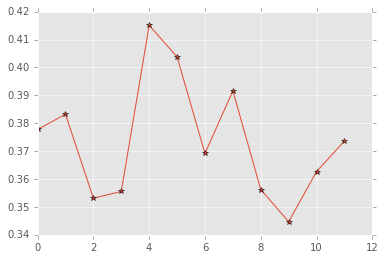

In [17]:
rat = opan['noise-pe']/opan['gain']
plt.plot(rat, marker='*')

In [18]:
opan.to_csv(idir+'pmt_calib_summary.cvs')
opan.to_hdf(idir+'pmt_calib_summary.h5','df',mode='w',format='table',data_columns=True)